/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, activation="relu", kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


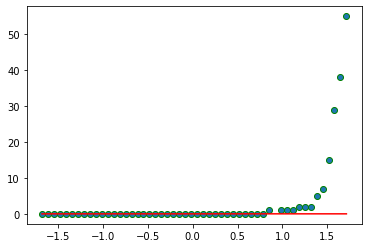

0


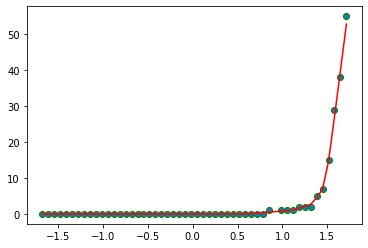

10000


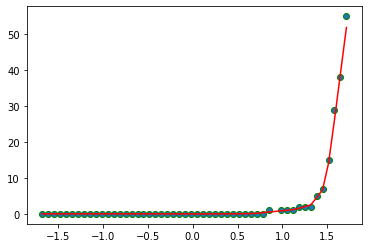

20000


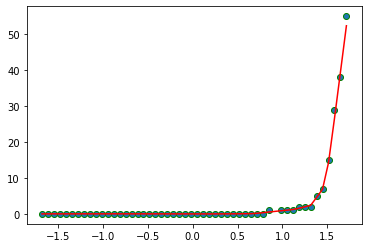

30000


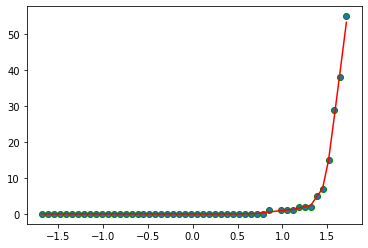

40000


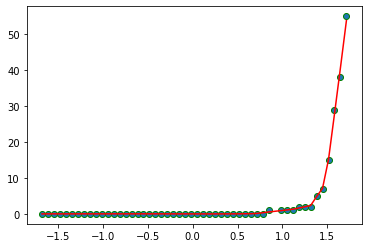

50000


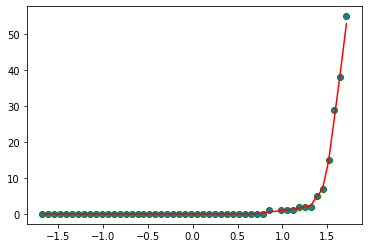

60000


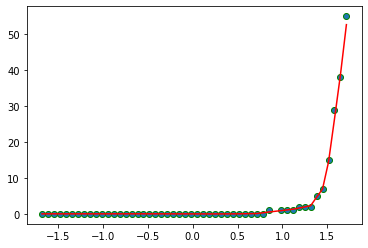

70000


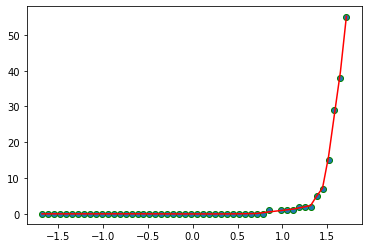

80000


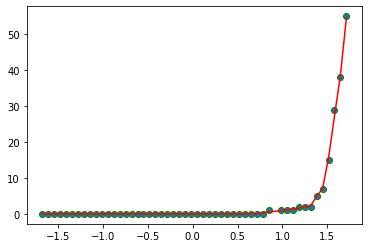

90000
Test


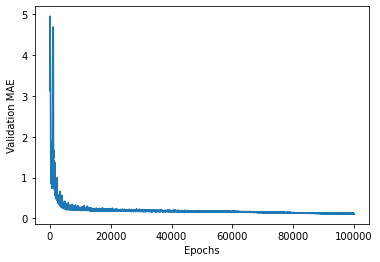

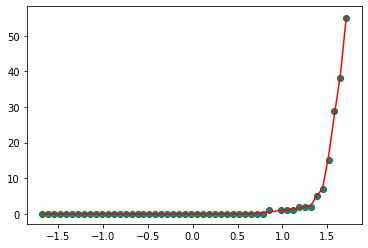

51/51 [==============================] - 0s 94us/step
Test MSE: 0.09059482492625202
Test MAE 0.12379367269721686
Time:  527.2131970649998


In [54]:
import timeit
#execution time
start = timeit.default_timer()

import numpy as np
#import keras
from keras import models
from keras import layers
from keras import callbacks
from keras import optimizers
import matplotlib.pyplot as plt

#Function to plot some predictions on callback:
def plotar(epoch, logs):

    if(epoch%10000.0==0):

        predictions = model.predict(day)
        plt.scatter(day, cases, edgecolors='g')
        plt.plot(day, predictions, 'r')
        plt.show()
        print(epoch)

#Print the current "epoch" during training:
def epoca_feedback(epoch, logs):
    print(epoch)

#Function that will generate a curve to plot the training log:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

#Define our Deep Learning model (dont need to be so deep in this case):
def build_model():

    #Define the structure of the nework
    model = models.Sequential()
    model.add(layers.Dense(160, activation='relu', input_dim=1))
    model.add(layers.Dense(100, activation='relu', init='uniform'))
    model.add(layers.Dense(80, activation='relu', init='uniform'))
    model.add(layers.Dense(output_dim=1))

    #Define the optimer and the learning rate:
    sgd = optimizers.SGD(lr=0.001);

    #Define the loss funcion and the optimizer algorithm
    model.compile(loss='mse',
                  optimizer=sgd,
                  metrics=['mae']
                  )

    return model

#Import generated data:
dados_importar = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/covid19_feedforwardNN/dataset_cases_21032020.txt", delimiter=" ", names="Day, Cases")
day = dados_importar['Day']
cases = dados_importar['Cases']

#Define new list to normalize:
day_normalized = day

#Normalize data 
mean = day_normalized.mean()
day_normalized -= mean
std = day_normalized.std()
day_normalized /= std

#Define our callbacks:
callbacks_list = [
        keras.callbacks.LambdaCallback(on_epoch_end=plotar)#,
        #keras.callbacks.LambdaCallback(on_epoch_end=epoca_feedback)
                                        ]

#Call/Build the model:
model = build_model()

#Define the number of epochs:
num_epochs=100000

#Start the training of the network:
history = model.fit(day_normalized,
                    cases,
                    validation_data = (day_normalized, cases),
                    epochs=num_epochs,
                    callbacks=callbacks_list,
                    verbose=0
                    )

#Save our trained network:
model.save('trained_network_keras_fit')

print('Test')

#Save the logs of the training and plot:
all_mae_histories = []
mae_history = history.history['val_mean_absolute_error']
all_mae_histories.append(mae_history)
average_mae_history = [
                       np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
                       ]
smooth_mae_history = smooth_curve(average_mae_history)

#Print the curve
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#Make a final prediction so we can see a graph:
predictions = model.predict(day)

#Plot the final prediction
plt.scatter(day_normalized, cases, edgecolors='g')
plt.plot(day_normalized, predictions, 'r')
plt.show()

#Test with our data so we can calculate the scores:
test_mse_score, test_mae_score = model.evaluate(day, cases)
print("Test MSE:", test_mse_score)
print("Test MAE", test_mae_score)

#Print the run time:
stop = timeit.default_timer()
print('Time: ', stop - start) 




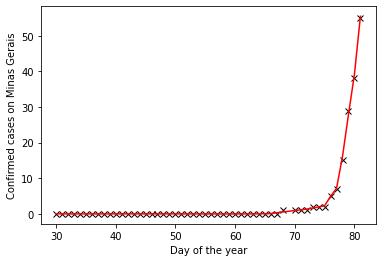

In [67]:
plt.plot(day_normalized*std+mean, cases, 'kx')
plt.plot(day_normalized*std+mean, predictions, 'r')
plt.ylabel('Confirmed cases on Minas Gerais')
plt.xlabel('Day of the year')
plt.show()